# imports

In [81]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timezone

# formatting data

In [74]:
df = pd.DataFrame()
with open('restructured_repeaters.json', 'r') as file:
    data = json.load(file)
for source_name, source_content in data.items():
    timestamps = [v['timestamp']['value'] for v in source_content['events']]
    events = pd.Series(timestamps, name=source_name)
    df = pd.concat([df, pd.DataFrame(events)])

# name the index for clarity
df.index.name = 'source_name'

# plotting

FRB20180909A 0.028897665049253656
FRB20190107B 0.030635785284655326
FRB20190116B 0.030781601408558384
FRB20190127B 0.0309514382495381
FRB20190209A 0.031156824622977
FRB20190210C 0.031171274789659552
FRB20190213A 0.031199679928020935
FRB20190222A 0.03137269084966357
FRB20190303D 0.031512610283809264
FRB20190328C 0.031928175412550705
FRB20190812A 0.03439545485264972
FRB20191013D 0.03564911648024904
FRB20191105B 0.0361373719108476
FRB20200118D 0.03779564304497388
FRB20200127B 0.038020786570194136
FRB20200320A 0.03932644198298797
FRB20200420A 0.04012591976516262
FRB20180910A 0.04335950660373216
FRB20200828A 0.04388822922330698
FRB20200913C 0.04437990630493003
FRB20181226F 0.04568191881988187
FRB20190110C 0.04603658332502286
FRB20190113A 0.046097129521717135
FRB20201114A 0.04650739461978408
FRB20190226B 0.047153301013831736
FRB20190430C 0.04873580738501819
FRB20190604A 0.049657357081621764
FRB20190609C 0.049808494223415725
FRB20171019A 0.05139553617245544
FRB20191114A 0.05451375184213633
FR

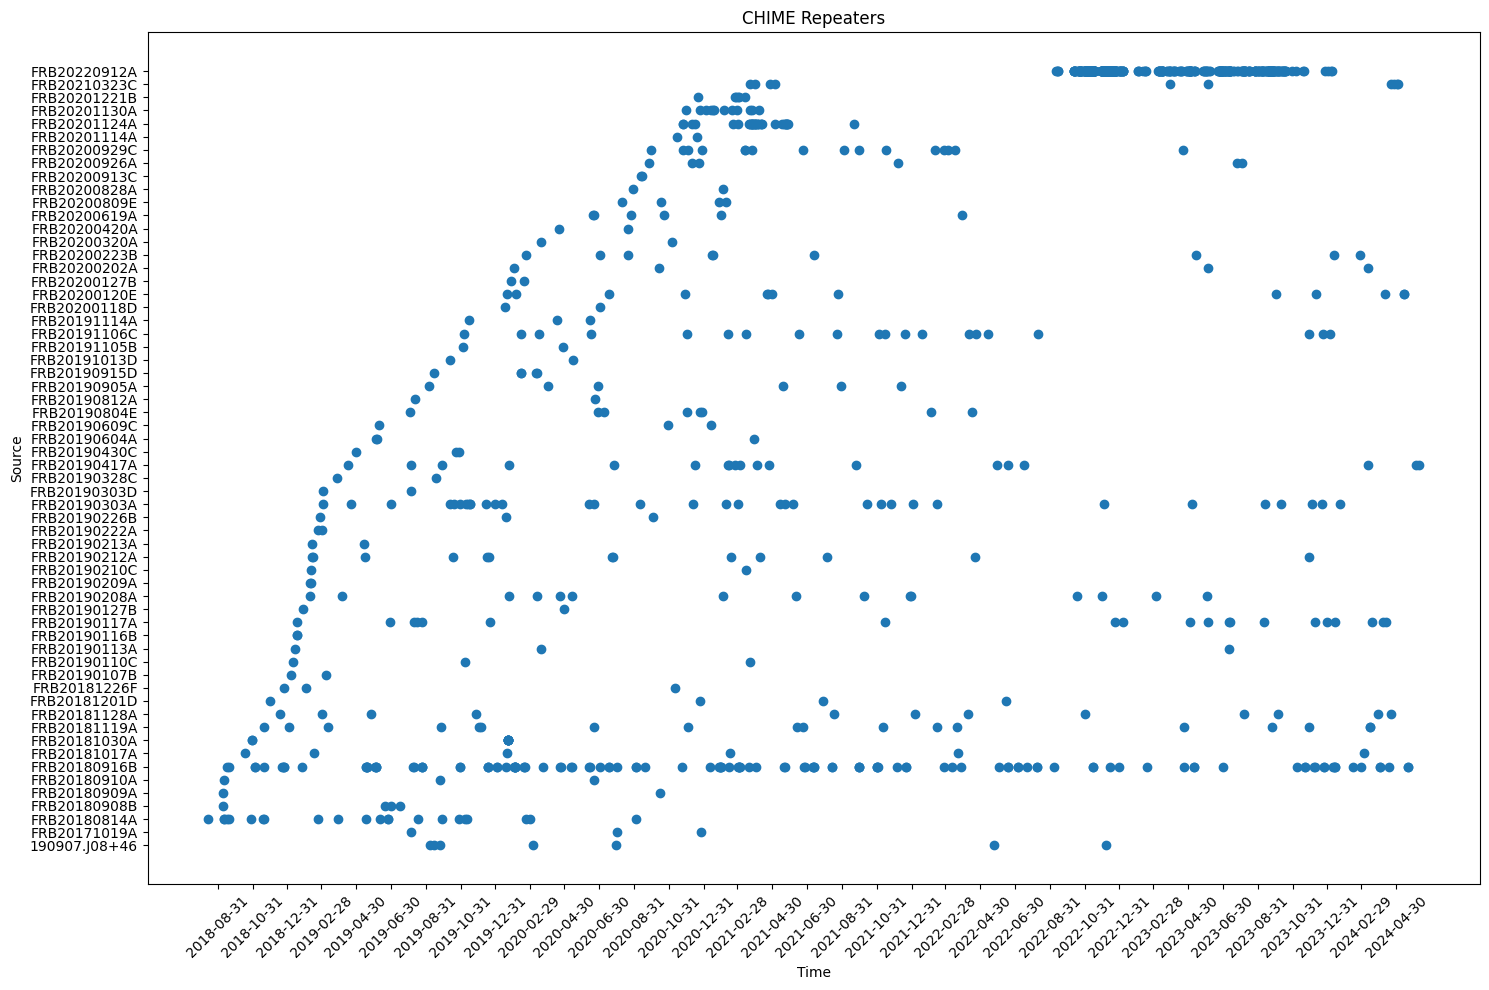

In [102]:
x_dates = []
y_coords = []
counts = {}
for source in df.columns:
    for timestamp in df[source]:
        if not pd.isnull(timestamp):
            timestamp = pd.to_datetime(timestamp)
            x_dates.append(timestamp)
            y_coords.append(source)
            if source in counts:
                counts[source] += 1
            else:
                counts[source] = 1
            
current_utc_time = datetime.utcnow()
scores = {}
for source in df.columns:
    first_time = min([pd.to_datetime(v) for v in df[source] if pd.notnull(v)])
    count = counts[source]
    score = count / ((current_utc_time-first_time).total_seconds()/2.628e+6)
    scores[source] = score

for source,score in sorted(scores.items(),key=lambda item: item[1]):
    print(source, score)
    
plt.figure(figsize=(15, 10))
plt.scatter(x_dates, y_coords, marker='o')
plt.xlabel('Time')
plt.ylabel('Source')
plt.title('CHIME Repeaters')

# Specify date format for x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(pd.date_range(min(x_dates), max(x_dates), freq='2ME'), rotation=45)

plt.tight_layout()
plt.show()